In [13]:
# Importing the libraries
from DBN import DBN
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [14]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

In [15]:
mnist_data.train_data = (mnist_data.train_data.type(torch.FloatTensor)/255).bernoulli()

In [16]:
mnist_data.train_data.shape

torch.Size([60000, 28, 28])

The number shown is the number: 2


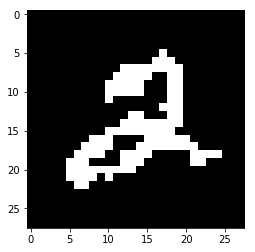

In [17]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [18]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
dbn_mnist = DBN(visible_units=28*28 ,
                hidden_units=[23*23 ,18*18] ,
                k = 5,
                learning_rate = 0.01,
                learning_rate_decay = True,
                xavier_init = True,
                increase_to_cd_k = False,
                use_gpu = False)

In [19]:
num_epochs = 1
batch_size = 10

dbn_mnist.train_static(mnist_data.train_data,mnist_data.train_labels,num_epochs , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 6000it [00:37, 161.36it/s]
Epoch:1 ,avg_cost = 0.5684161186218262 ,std_cost = 0.11079949140548706 ,avg_grad = 12060.1484375 ,std_grad = 2013.1046142578125
--------------------
Training the 2 st rbm layer
RBM fitting: 6000it [00:26, 224.74it/s]
Epoch:1 ,avg_cost = 1.5691903829574585 ,std_cost = 0.16712814569473267 ,avg_grad = 11926.0732421875 ,std_grad = 535.552734375


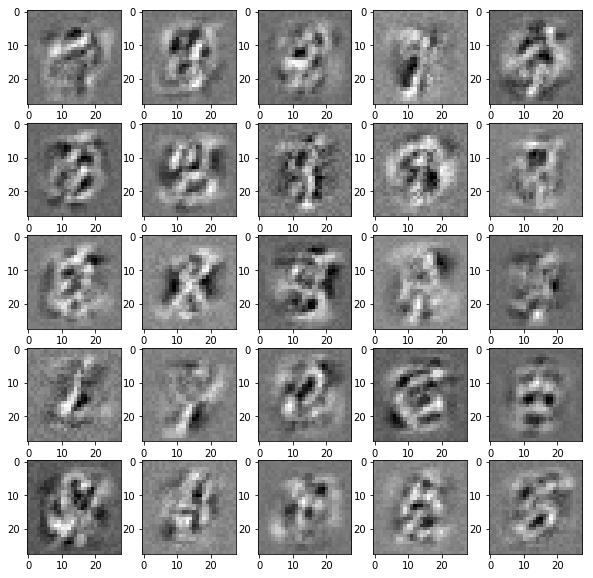

In [8]:
# visualising layer 1
learned_weights = dbn_mnist.rbm_layers[0].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

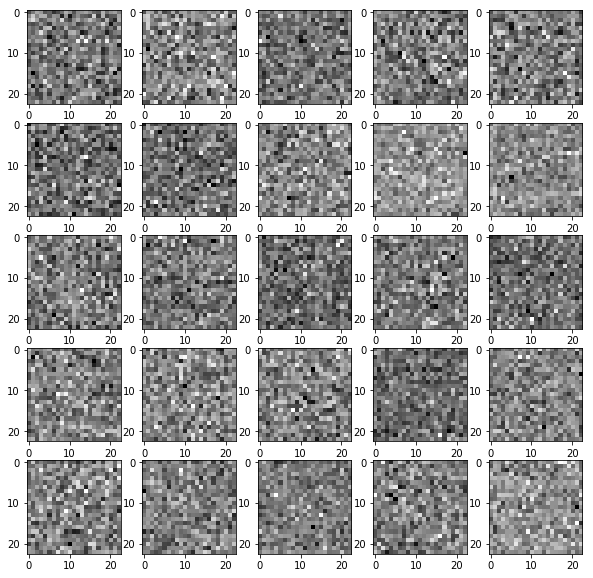

In [9]:
# visualising layer 2
learned_weights = dbn_mnist.rbm_layers[1].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((23,23)), cmap=plt.cm.gray)
plt.show()

In [10]:
number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.train_data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.train_labels[i] == number):
        particular_mnist.append(mnist_data.train_data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

5421

In [11]:
train_data = torch.stack([torch.Tensor(i) for i in particular_mnist])
train_label = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))])

In [12]:
dbn_mnist.train_static(train_data,train_label,20 , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 542it [00:03, 163.61it/s]
Epoch:1 ,avg_cost = 0.5138115286827087 ,std_cost = 0.0425686277449131 ,avg_grad = 10668.5888671875 ,std_grad = 516.7371215820312
RBM fitting: 542it [00:04, 124.25it/s]
Epoch:2 ,avg_cost = 0.48816847801208496 ,std_cost = 0.04261276498436928 ,avg_grad = 10575.5771484375 ,std_grad = 528.037109375
RBM fitting: 542it [00:03, 159.27it/s]
Epoch:3 ,avg_cost = 0.4786020517349243 ,std_cost = 0.044877756386995316 ,avg_grad = 10557.1259765625 ,std_grad = 545.4505004882812
RBM fitting: 542it [00:03, 164.66it/s]
Epoch:4 ,avg_cost = 0.4744814932346344 ,std_cost = 0.04380681365728378 ,avg_grad = 10563.4716796875 ,std_grad = 531.55859375
RBM fitting: 542it [00:03, 163.43it/s]
Epoch:5 ,avg_cost = 0.47048309445381165 ,std_cost = 0.04149038344621658 ,avg_grad = 10556.326171875 ,std_grad = 530.7073974609375
RBM fitting: 542it [00:02, 181.68it/s]
Epoch:6 ,avg_cost = 0.46638059616088867 ,std_cost = 0.04234062507748604 ,av

The original number: 1


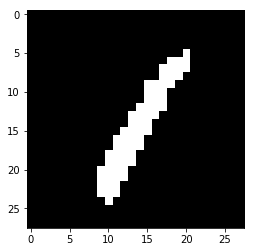

The reconstructed image


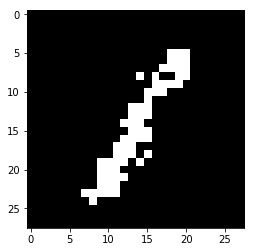

In [17]:
idx = 3
img = mnist_data.train_data[idx]
reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

_,reconstructed_img= dbn_mnist.reconstruct(reconstructed_img)

reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()